In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
#%matplotlib tk


For simple harmonic motion you just have $F = kx$

This can be rewritten as 

$ma = kx$

$mx''(t) = kx(t)$

Using the same logic as before we can say that $x'(t) = v$

such that $v'(t) = x''(t) = kx/m$

$v'(t) = kx/m$

$v(t)_{h} = v(t) + dt * k/m * x(t)$

$x(t)_{h} = x(t) + dt * v(t)$

For a single spring including damping: 

Since we want to include friction we would have

$F = -kx  - bv$

$mx''(t) = -kx(t) - bx'(t) $

diff eq: $x''(t) + 2 \beta * x'(t) + \omega^2 * x(t) = 0$

$\beta = k/2m $ and $\omega = (k/m)^{1/2}$

$x''(t) = -2 \beta * x'(t) - \omega^2 * x(t)$

let $v(t) = x'(t) $

$x''(t) = -2 \beta v(t) - \omega ^2 * x(t)$

$v'(t) = x''(t)$

so $x''(t) = v'(t) = -2 \beta * x'(t) - \omega^2 * x(t)$

$v'(t) = -2 \beta v(t) - \omega^2 * x(t)$

Euler Equations:

$x_{h+1} = x_h + \Delta t * v_h $

$v_{h+1} = v_h + \Delta t * (-2 \beta * v_h - \omega^2 * x_h) $

In [2]:
#creating the function for oscillator that includes damping / frictional force 
#takes in N (length of time), B (friction/damping value), w ((k/m)**1/2), and initial velocity and position 
def oscillator(N, B, w, v, x):
    x_arr = []
    x_arr.append(x)
    t = np.linspace(0, N, 1000)
    #eulers method 
    for dt in t: 
        if dt == N: 
            break
        v = v + (dt * ((-2*B * v) - (w**2*x)))
        x = x + (dt * v)
        x_arr.append(x)
    #returns figure 
    fig = plt.figure()
    plt.plot(t, x_arr)
    plt.xlabel('time (t)')
    plt.ylabel('x(t)')

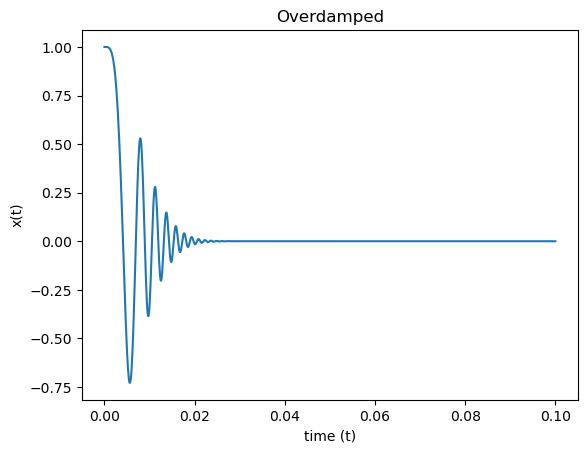

In [3]:
%matplotlib inline
underdamped = oscillator(0.1, 2, 20, 0, 1)
plt.title('Overdamped')
plt.show()

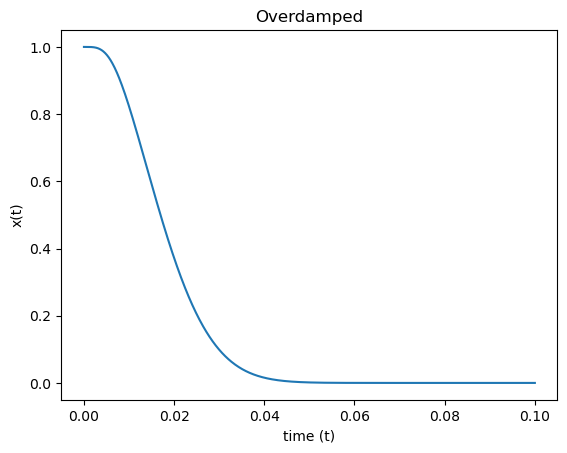

In [4]:
%matplotlib inline
overdamped = oscillator(0.1, 4, 2, 0, 1)
plt.title('Overdamped')
plt.show()

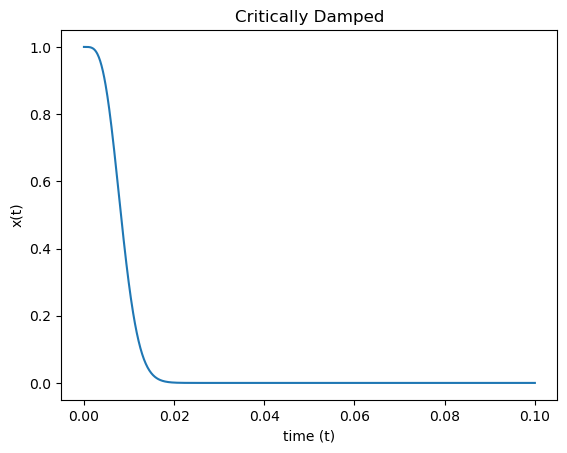

In [5]:
%matplotlib inline
critically = oscillator(0.1, 5, 5, 0, 1)
plt.title('Critically Damped')
plt.show()

In [6]:
#same function as before except this one returns an array of position and time values 
def oscillator_pos(N, B, w, v, x):
    x_arr = []
    x_arr.append(x)
    t = np.linspace(0, N, 1000)
    for dt in t: 
        if dt == N: 
            break
        v = v + (dt * ((-2*B * v) - (w**2*x)))
        x = x + (dt * v)
        x_arr.append(x)
    return x_arr, t

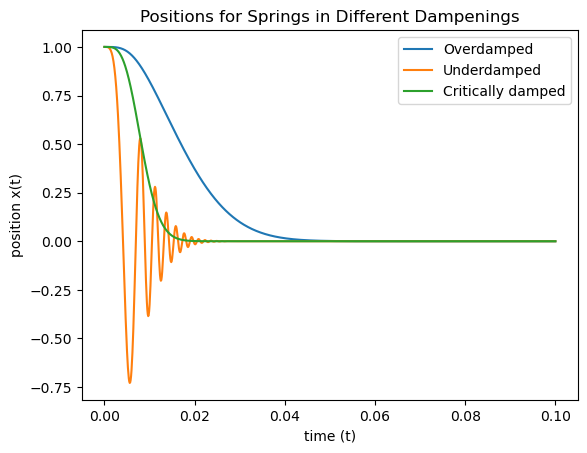

In [7]:
%matplotlib inline
N = 0.1
x_overdamped = oscillator_pos(N, 4, 2, 0, 1)[0]
x_underdamped = oscillator_pos(N, 2, 20, 0, 1)[0]
x_critically = oscillator_pos(N, 5, 5, 0, 1)[0]
t = oscillator_pos(N, 20, 2, 0, 1)[1]
plt.figure()
plt.plot(t, x_overdamped, label = 'Overdamped')
plt.plot(t, x_underdamped, label = 'Underdamped')
plt.plot(t, x_critically, label = 'Critically damped')
plt.xlabel('time (t)')
plt.ylabel('position x(t)')
plt.title('Positions for Springs in Different Dampenings')
plt.legend()
plt.show()

In [8]:
#defining a square to use in the animations
#takes in the center position of the square, creates a 2x2 length square
#returns array of values for the x and y values for the left, right, top, and bottom values
def square(x_center, y_center): 
    center = [x_center, y_center]
    #corners 
    top_left = [x_center -2, y_center + 2]
    top_right = [x_center + 2, y_center + 2]
    bottom_left = [x_center - 2, y_center - 2]
    bottom_right = [x_center + 2, y_center - 2]
    
    #sides 
    #for the sides you want all of the same x values but a range of different y values
    x_left = (x_center - 2)*np.ones(50)
    x_right = (x_center + 2) * np.ones(50)
    side = np.linspace(y_center -2, y_center + 2)
    
    #for the top and bottom you want the same y values but a range of x values 
    y_top = (y_center + 2) * np.ones(50)
    y_bottom = (y_center - 2) * np.ones(50)
    top_bottom = np.linspace(x_center + 2, x_center - 2)
    
    return x_left, x_right, side, y_top, y_bottom, top_bottom

In [9]:
#function that creates a spring
#takes in spring constant, returns array of x positions and the y positions of the spring
#i made this in order to animate the spring 
def spring(start, end, k): 
    x = np.linspace(start, end)
    spring = []
    for i in x: 
        spring.append(0.5 * np.sin(k * np.pi * (i+5)/(end+5)) + 2)
    return x, spring

In [10]:
#simulates the overdamped scenario (B > w)
%matplotlib tk
metadata = dict(title='Overdamped', artist='SK',comment='Simulation of underdamped spring.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()
overdamped_square = oscillator_pos(0.1, 4, 2, 0, 1)

with writer.saving(fig, "overdamped.mp4", dpi=200):
    for i in overdamped_square[0]:
        springs = spring(-5, i-2, k = 10)
        squares = square(i, 2)
        plt.clf()
        plt.title('Overdamped System (B > w)')
        plt.plot(springs[0], springs[1])
        plt.plot(squares[0], squares[2], color = 'purple')
        plt.plot(squares[1], squares[2], color = 'purple')
        plt.plot(squares[5], squares[3], color = 'purple')
        plt.plot(squares[5], squares[4], color = 'purple')
        plt.xlim(-5, 5)
        plt.ylim(0, 10)
        plt.xlabel('position')
        plt.yticks(color='w')
        plt.draw()
        plt.pause(0.1)
        writer.grab_frame()

In [11]:
#simulates the underdamped scenario (B < w)
%matplotlib tk
metadata = dict(title='Underdamped', artist='SK',comment='Simulation of underdamped spring.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()
underdamped_square = oscillator_pos(0.1, 2, 20, 0, 1)

with writer.saving(fig, "Underdamped.mp4", dpi=200):
    for i in underdamped_square[0]:
        springs = spring(-5, i-2, k = 10)
        squares = square(i, 2)
        plt.clf()
        plt.title('Underdamped System (B < w)')
        plt.plot(springs[0], springs[1])
        plt.plot(squares[0], squares[2], color = 'purple')
        plt.plot(squares[1], squares[2], color = 'purple')
        plt.plot(squares[5], squares[3], color = 'purple')
        plt.plot(squares[5], squares[4], color = 'purple')
        plt.xlim(-5, 5)
        plt.ylim(0, 10)
        plt.xlabel('position')
        plt.yticks(color='w')
        plt.draw()
        plt.pause(0.1)
        
        writer.grab_frame()

In [12]:
#simulates the critically damped scenario (B = w)
%matplotlib tk
metadata = dict(title='Critically Damped', artist='SK',comment='Simulation of critically damped spring.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()
critically_damped = oscillator_pos(0.1, 5, 5, 0, 1)

with writer.saving(fig, "criticallydamped.mp4", dpi=200):
    for i in critically_damped[0]:
        springs = spring(-5, i-2, k = 10)
        squares = square(i, 2)
        plt.clf()
        plt.title('Critically Damped System (B = w)')
        plt.plot(springs[0], springs[1])
        plt.plot(squares[0], squares[2], color = 'purple')
        plt.plot(squares[1], squares[2], color = 'purple')
        plt.plot(squares[5], squares[3], color = 'purple')
        plt.plot(squares[5], squares[4], color = 'purple')
        plt.xlim(-5, 5)
        plt.ylim(0, 10)
        plt.xlabel('position')
        plt.yticks(color='w')
        plt.draw()
        plt.pause(0.1)
        writer.grab_frame()

For a double pendulum the equations of motion change. 

We start off with: 

$F_1 = -k_1(x_1 - L_1) + k_2(x_2 - x_1  - w_1 - L_2)$

$F_2 = -k_2(x_2 - x_1  - w_1 - L_2)$

where w1 is the width of the blocks and L1 and L2 are the rest lengths of the springs

After some rearranging: 

$m_1 x_1''(t) + b_1 x_1'(t) + k_1 (x_1 - L_1) - k_2 (x_2 - x_1  - w_1 - L_2) = 0$

$m_2 x_2''(t) + b_2 x_2'(t) + k_2 (x_2 - x_1 - w_1 - L_2) = 0$

Using similar methods as last time we can use : 

$v_1 = x_1'(t), v_2 = x_2'(t)$

Which we then get 

$x_1'(t) = v_1(t)$

$v_1'(t) = (-b_1 v_1(t) - k_1 (x_1(t) - L_1) + k_2 (x_2(t) - x_1(t) - w_1 - L_2))/m_1$

$x_2'(t) = v_2(t)$

$v_2'(t) = (-b_2 v_2(t) - k_2 (x_2(t) - x_1(t) - w_1 - L_2))/m_2$


Using Euler's method we get: 

$x_{1h} = x_1(t) + dt * v_1(t)$

$v_{1h} = v_1(t) + dt * ((-b_1 v_1(t) - k_1 (x_1(t) - L_1) + k_2 (x_2(t) - x_1(t) - w_1 - L_2))/m_1)$

$x_{2h} = x_2(t) + dt * v_2(t)$

$v_{2h} = v_2(t) + dt * ((-b_2 v_2(t) - k_2 (x_2(t) - x_1(t) - w_1 - L_2))/m_2)$

In [13]:
#creating a function for the position for a double spring using the method described above 
#inputs all of the values described above 
#returns positions of both masses and array of time 
def double_spring(N, x1, x2, v1, v2, w1, w2, m1, m2, k1, k2, L1, L2, b1, b2): 
    x1_arr = []
    x2_arr = []
    x1_arr.append(x1)
    x2_arr.append(x2)
    t = np.linspace(0, N, 100)
    #starting euler's method 
    for dt in t: 
        if dt == N: 
            break
        x1 = x1 + dt * v1
        x2 = x2 + dt * v2
        v1 = v1 + dt * (-b1*v1/m1 - (k1/m1)*(x1 - L1) + (k2/m1)*(x2 - x1 - w1 - L2))
        v2 = v2 + dt * (-b2*v2/m2 - (k2/m2)*(x2 - x1 - w1 - L2))
        x1_arr.append(x1)
        x2_arr.append(x2)
    return x1_arr, x2_arr, t

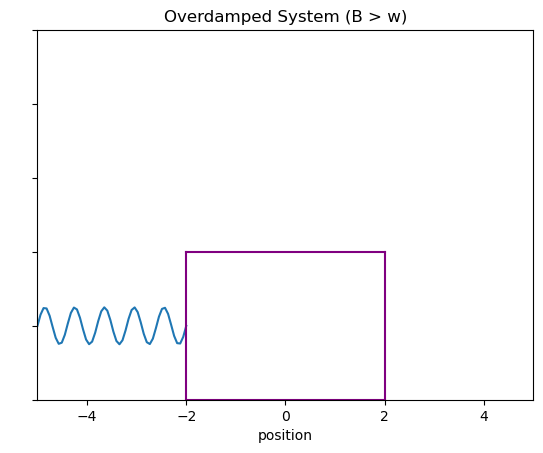

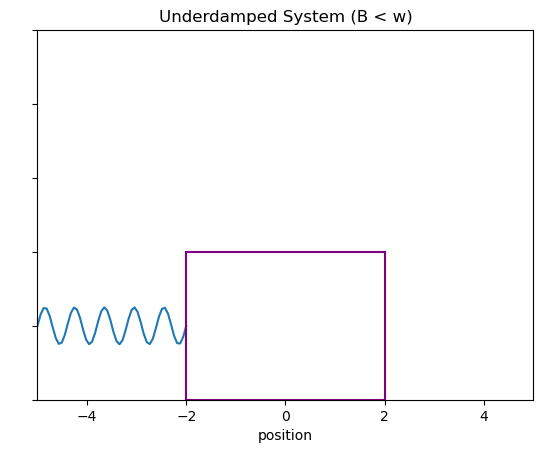

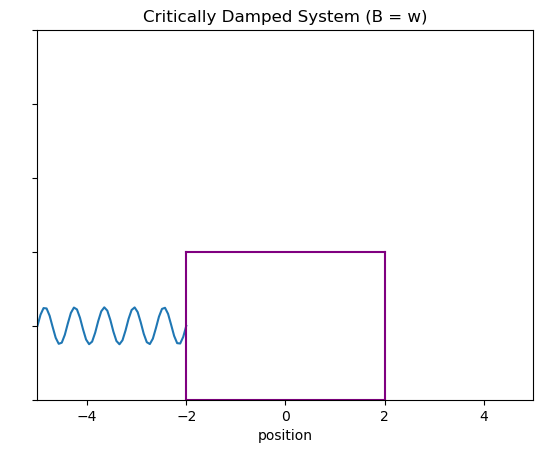

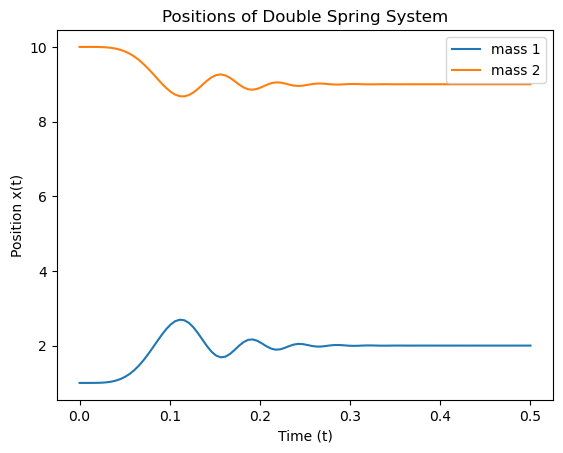

In [14]:
#plotting positions of double spring system 
%matplotlib inline
ds = double_spring(0.5, 1, 10, 0, 0, 4, 4, 1, 1, 2, 3, 2, 3, 1, 1)
plt.figure()
plt.plot(ds[2], ds[0])
plt.plot(ds[2], ds[1])
plt.xlabel('Time (t)')
plt.ylabel('Position x(t)')
plt.legend(['mass 1', 'mass 2'])
plt.title('Positions of Double Spring System')
plt.show()

In [15]:
#animating the double spring system 
%matplotlib tk
metadata = dict(title='Double Spring', artist='SK',comment='Simulation of double spring.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()
ds = double_spring(0.5, 1, 10, 0, 0, 4, 4, 1, 1, 2, 2, 2, 2, 1, 1)
pos1 = ds[0]
pos2 = ds[1]

with writer.saving(fig, "doublespring.mp4", dpi=200):
    for i in range(len(ds[0])):
        square1 = square(pos1[i], 2)
        square2 = square(pos2[i], 2)
        spring1 = spring(-5, pos1[i]-2, k = 10)
        spring2 = spring(square1[1], pos2[i]-2, k = 10)
        plt.clf()
        plt.title('Double Spring System')
        plt.plot(spring1[0], spring1[1])
        plt.plot(spring2[0], spring2[1])
        
        #plotting square 1
        plt.plot(square1[0], square1[2], color = 'purple')
        plt.plot(square1[1], square1[2], color = 'purple')
        plt.plot(square1[5], square1[3], color = 'purple')
        plt.plot(square1[5], square1[4], color = 'purple')
        
        #plotting square 2
        plt.plot(square2[0], square2[2], color = 'purple')
        plt.plot(square2[1], square2[2], color = 'purple')
        plt.plot(square2[5], square2[3], color = 'purple')
        plt.plot(square2[5], square2[4], color = 'purple')
        
        plt.xlim(-5, 15)
        plt.ylim(0, 20)
        plt.xlabel('position')
        plt.yticks(color='w')
        plt.draw()
        plt.pause(0.1)
        writer.grab_frame()